## Import Libraries

In [1]:
import UNet_Training as train
import UNet_Inference as inference
import torch
import torchio as tio
import os
import glob
import random
import numpy as np
import monai
import matplotlib.pyplot as plt


## Filter out problematic images

In [58]:
source_dir = "D:\\THROMBMICS-ALARMS_20240531\\SWI"
problem_dir = "D:\\THROMBMICS-ALARMS_20240531\\Problem_Images\\SWI"
prev = []
for file in os.listdir(source_dir):
    number = file.split("_")[1:2]
    # if file.split("_")[-1] == "ph.nii.gz":
    #     ph_q = True
    # else:
    #     ph_q = False
    if (number == prev):
        print(number)
        #os.rename(os.path.join(source_dir, file), os.path.join(problem_dir, file))
    prev = number

['06-10664-D0MR']
['09-10683-D0MR']
['09-10890-D0MR']
['16-10232-D0MR']
['21-10049-D0MR']
['21-10049-D0MR']


In [14]:
source_dir = "D:\\THROMBMICS-ALARMS_20240531\\TOF3D"
problem_dir = "D:\\THROMBMICS-ALARMS_20240531\\Problem_Images\\TOF3D"
prev = []
for file in os.listdir(source_dir):
    number = file.split("_")[1:2]
    if "_".join(file.split("_")[-2:]) == "Eq_1.nii.gz":
        eq1_q = True
    else:
        eq1_q = False
    if (number == prev) & (eq1_q):
        os.rename(os.path.join(source_dir, file), os.path.join(problem_dir, file))
    prev = number

In [42]:
swi_dir = "D:\\THROMBMICS-ALARMS_20240531\\SWI"
mask_dir = "D:\\THROMBMICS-ALARMS_20240531\\MASK"

swi_numbers = [file.split("_")[1:2][0] for file in os.listdir(swi_dir)]
mask_numbers = [file.split("_")[1:2][0] for file in os.listdir(mask_dir)]

diff = set(mask_numbers) - set(swi_numbers)

print(diff)

{'16-10170-D0MR', '02-10871-D0MR', '07-10333-D0MR', '14-10034-D0MR', '21-10163-D0MR', '21-10135-D0MR', '18-10428-D0MR', '01-10221-D0MR', '14-10119-D0MR', '14-10239-D0MR', '06-10750-D0MR', '05-10410-D0MR', '30-10034-D0MR', '18-10183-D0MR', '14-10164-D0MR', '30-10085-D0MR', '06-10487-D0MR', '14-10269-D0MR', '14-10115-D0MR', '18-10542-D0MR', '18-10099-D0MR', '06-10516-D0MR', '09-10890-D0MR', '21-10158-D0MR', '02-10874-D0MR', '30-10091-D0MR', '16-10168-D0MR', '30-10092-D0MR', '30-10090-D0MR', '06-10778-D0MR', '14-10156-D0MR', '02-10555-D0MR', '17-10120-D0MR', '16-10025-D0MR', '14-10172-D0MR', '02-10878-D0MR', '14-10068-D0MR', '06-10769-D0MR', '02-10722-D0MR', '14-10153-D0MR', '14-10238-D0MR', '30-10082-D0MR', '30-10083-D0MR', '07-10335-D0MR', '14-10120-D0MR', '30-10076-D0MR', '18-10396-D0MR', '14-10123-D0MR', '18-10206-D0MR', '14-10173-D0MR', '14-10087-D0MR', '21-10049-D0MR', '30-10088-D0MR', '14-10166-D0MR', '04-10442-D0MR', '14-10125-D0MR', '30-10094-D0MR', '14-10243-D0MR', '09-10674-D0M

In [57]:
source_dir = "E:\\Data_ETIS\\THROMBMICS-ALARMS_20240531"
target_dir = "E:\\Data_ETIS\\Temp"

for number in list(diff):
    for directory in glob.glob(os.path.join(source_dir, "2018-104_"+ number, "T2star_*")):
        for nii_file in os.listdir(directory):
            os.rename(os.path.join(directory, nii_file), os.path.join(target_dir, nii_file))
            print("Processed "+ nii_file)

Processed 2018-104_16-10170-D0MR_22_AX_T2_EG.nii.gz
Processed 2018-104_02-10871-D0MR_6_Ax_T2_GRE.nii.gz
Processed 2018-104_07-10333-D0MR_20_SWI_Images.nii.gz
Processed 2018-104_14-10034-D0MR_5_Ax_T2_.nii.gz
Processed 2018-104_21-10163-D0MR_401_cs_T2_FFE.nii.gz
Processed 2018-104_21-10135-D0MR_5_Ax_T2_.nii.gz
Processed 2018-104_18-10428-D0MR_11_T2_EG_AX.nii.gz
Processed 2018-104_01-10221-D0MR_11_SWI_Images.nii.gz
Processed 2018-104_14-10119-D0MR_16_T2_EG_AX.nii.gz
Processed 2018-104_14-10239-D0MR_5_Ax_T2_GRE_rapide.nii.gz
Processed 2018-104_06-10750-D0MR_8_AX_T2_EG_STD.nii.gz
Processed 2018-104_05-10410-D0MR_12_t2_fl2d_tra_4mm_hemo_te_25.nii.gz
Processed 2018-104_30-10034-D0MR_8_t2_fl2d_ax.nii.gz
Processed 2018-104_18-10183-D0MR_12_T2_EG_AX.nii.gz
Processed 2018-104_14-10164-D0MR_5_Ax_T2_GRE_rapide.nii.gz
Processed 2018-104_30-10085-D0MR_11_SWI_Images.nii.gz
Processed 2018-104_06-10487-D0MR_9_AX_T2_EG_STD.nii.gz
Processed 2018-104_14-10269-D0MR_16_AX_T2_.nii.gz
Processed 2018-104_14-101

## Separate Test Batch of Images

In [26]:
thrombus_mask_train_dir = "D:\\data_ETIS_781\\Training\\Train_labels\\MASK_Train"
thrombus_mask_test_dir = "D:\\data_ETIS_781\\Training\\Test_labels\\MASK_Test"
thrombus_mask_val_dir = "D:\\data_ETIS_781\\Training\\Validation_labels\\MASK_Val"
foreground_mask_train_dir = "D:\\data_ETIS_781\\Training\\Train_labels\\MASK_Foreground_Train"
foreground_mask_test_dir = "D:\\data_ETIS_781\\Training\\Test_labels\\MASK_Foreground_Test"
foreground_mask_val_dir = "D:\\data_ETIS_781\\Training\\Validation_labels\\MASK_Foreground_Val"
swi_train_dir = "D:\\data_ETIS_781\\Training\\Train_dataset\\SWI_Train"
swi_test_dir = "D:\\data_ETIS_781\\Training\\Test_dataset\\SWI_Test"
swi_val_dir = "D:\\data_ETIS_781\\Training\\Validation_dataset\\SWI_Val"
tof_train_dir = "D:\\data_ETIS_781\\Training\\Train_dataset\\TOF3D_Train"
tof_test_dir = "D:\\data_ETIS_781\\Training\\Test_dataset\\TOF3D_Test"
tof_val_dir = "D:\\data_ETIS_781\\Training\\Validation_dataset\\TOF3D_Val"

In [27]:
def separate_image_batch(thrombus_mask_source, thrombus_mask_destination, foreground_mask_source, foreground_mask_destination, swi_source, swi_destination, tof_source, tof_destination, batch_size, seed_value=777):
    # Separate four source folders, thrombus mask(labels) , brain foreground masks with thrombus, swi images, tof images into four other destination folders (e.g. validation or test),
    # sending the specified number of images selected randomly.
    random.seed(seed_value)
    batch_indexes = random.sample(range(len(os.listdir(thrombus_mask_source))), batch_size)

    thrombus_mask_file_list = [os.listdir(thrombus_mask_source)[index] for index in batch_indexes]
    for file in thrombus_mask_file_list:
        os.rename(os.path.join(thrombus_mask_source, file), os.path.join(thrombus_mask_destination, file))

    foreground_mask_file_list = [os.listdir(foreground_mask_source)[index] for index in batch_indexes]
    for file in foreground_mask_file_list:
        os.rename(os.path.join(foreground_mask_source, file), os.path.join(foreground_mask_destination, file))
    
    swi_file_list = [os.listdir(swi_source)[index] for index in batch_indexes]
    for file in swi_file_list:
        os.rename(os.path.join(swi_source, file), os.path.join(swi_destination, file))

    tof_file_list = [os.listdir(tof_source)[index] for index in batch_indexes]
    for file in tof_file_list:
        os.rename(os.path.join(tof_source, file), os.path.join(tof_destination, file))

Separate test.

In [28]:
separate_image_batch(thrombus_mask_train_dir, thrombus_mask_test_dir, foreground_mask_train_dir, foreground_mask_test_dir, swi_train_dir, swi_test_dir, tof_train_dir, tof_test_dir, 100, seed_value=777)

Separate validation.

In [29]:
separate_image_batch(thrombus_mask_train_dir, thrombus_mask_val_dir, foreground_mask_train_dir, foreground_mask_val_dir, swi_train_dir, swi_val_dir, tof_train_dir, tof_val_dir, 181, seed_value=777)

Clear out the training folders.

In [4]:
def clean_training_folders(thrombus_mask_train_dir, thrombus_mask_test_dir, thrombus_mask_val_dir, foreground_mask_train_dir, foreground_mask_test_dir, foreground_mask_val_dir, swi_train_dir, swi_test_dir, swi_val_dir, tof_train_dir, tof_test_dir, tof_val_dir):
    # Remove files from training, validation and test folders of labels, foreground masks, swi images and tof images.
    folder_list = [thrombus_mask_train_dir, thrombus_mask_test_dir, thrombus_mask_val_dir, foreground_mask_train_dir, foreground_mask_test_dir, foreground_mask_val_dir, swi_train_dir, swi_test_dir, swi_val_dir, tof_train_dir, tof_test_dir, tof_val_dir]
    for folders in folder_list:
        for file in os.listdir(folders):
            os.remove(os.path.join(folders, file))

In [5]:
clean_training_folders(thrombus_mask_train_dir, thrombus_mask_test_dir, thrombus_mask_val_dir, foreground_mask_train_dir, foreground_mask_test_dir, foreground_mask_val_dir, swi_train_dir, swi_test_dir, swi_val_dir, tof_train_dir, tof_test_dir, tof_val_dir)

Fill training folders from processed images folder

In [8]:
def fill_training_folders(source_dir, thrombus_mask_train_dir, swi_train_dir, tof_train_dir):
    # Send images from a source folder containing MASK, SWI and TOF3D folders to the training folders.
    for folders in os.listdir(source_dir):
        if (folders.split("_")[0] == "MASK") | (folders == "MASK"):
            for files in os.listdir(os.path.join(source_dir, folders)):
                os.rename(os.path.join(source_dir, folders, files), os.path.join(thrombus_mask_train_dir,files))
        elif folders.split("_")[0] == "SWI":
            for files in os.listdir(os.path.join(source_dir, folders)):
                os.rename(os.path.join(source_dir, folders, files), os.path.join(swi_train_dir,files))
        elif folders.split("_")[0] == "TOF3D":
            for files in os.listdir(os.path.join(source_dir, folders)):
                os.rename(os.path.join(source_dir, folders, files), os.path.join(tof_train_dir,files))

In [13]:
source_dir = "D:\\data_ETIS_781\\Resized"

fill_training_folders(source_dir, thrombus_mask_train_dir, swi_train_dir, tof_train_dir)

## 3D Segmentation Training

### Use the SubjectsDataset class from torchio

In [3]:
train_swi_dir = "D:\\data_ETIS_781\\Training\\Train_dataset\\SWI_Train"
train_label_dir = "D:\\data_ETIS_781\\Training\\Train_labels\\MASK_Train"
train_foreground_label_dir = "D:\\data_ETIS_781\\Training\\Train_labels\MASK_Foreground_Train"
val_swi_dir = "D:\\data_ETIS_781\\Training\\Validation_dataset\\SWI_Val"
val_label_dir = "D:\\data_ETIS_781\\Training\\Validation_labels\\MASK_Val"
val_foreground_label_dir = "D:\\data_ETIS_781\\Training\\Validation_labels\\MASK_Foreground_Val"
test_swi_dir = "D:\\data_ETIS_781\\Training\\Test_dataset\\SWI_Test"
test_label_dir = "D:\\data_ETIS_781\\Training\\Test_labels\\MASK_Test"
test_foreground_label_dir = "D:\\data_ETIS_781\\Training\\Test_labels\\MASK_Foreground_Test"

In [5]:
train_dataset = train.load_subjectsdataset_1channel(train_swi_dir, train_label_dir, train_foreground_label_dir)
val_dataset = train.load_subjectsdataset_1channel(val_swi_dir, val_label_dir, val_foreground_label_dir)

### Setup Sampler

In [6]:
train_sampler = tio.data.LabelSampler(patch_size=(145,145,18), label_name="foreground_label", label_probabilities={0: 0, 1: 0.8, 2: 0.2})

In [7]:
queue_length = 3500
samples_per_volume = 25

train_patches_queue = tio.Queue(train_dataset, queue_length, samples_per_volume, train_sampler, num_workers=0)
val_patches_queue = tio.Queue(val_dataset, queue_length, samples_per_volume, train_sampler, num_workers=0)

train_patches_loader = tio.SubjectsLoader(train_patches_queue, batch_size=8, num_workers=0)
val_patches_loader = tio.SubjectsLoader(val_patches_queue, batch_size=8, num_workers=0)

In [39]:
tio.Queue.get_max_memory_pretty(train_patches_queue)

'14.8 GiB'

### Training Loop

In [8]:
model = monai.networks.nets.BasicUNetPlusPlus(spatial_dims=3, in_channels=1, out_channels=1, features=(32,32,64,128,256,32))

BasicUNetPlusPlus features: (32, 32, 64, 128, 256, 32).


In [9]:
focal_loss = monai.losses.FocalLoss(gamma=6, alpha=0.75)

In [10]:
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Training Epoch 1/10:   0%|          | 0/1816 [00:00<?, ?it/s]c:\Users\wijflo\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\torchio\data\image.py:251: UserWarning: Using TorchIO images without a torchio.SubjectsLoader in PyTorch >= 2.3 might have unexpected consequences, e.g., the collated batches will be instances of torchio.Subject with 5D images. Replace your PyTorch DataLoader with a torchio.SubjectsLoader so that the collated batch becomes a dictionary, as expected. See https://github.com/fepegar/torchio/issues/1179 for more context about this issue.
  warnings.warn(message, stacklevel=1)
Training Epoch 1/10: 100%|██████████| 1816/1816 [47:47<00:00,  1.58s/it]  


Epoch 1/10, Training Loss: 0.00006119


Validating Epoch 1/10: 100%|██████████| 313/313 [04:03<00:00,  1.29it/s]  

Epoch 1/10, Validation Loss: 0.00001381


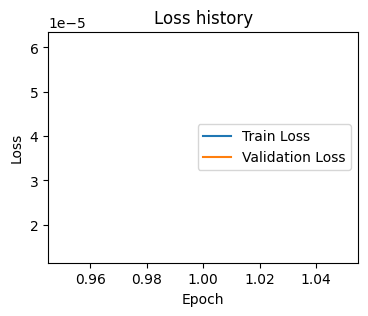

Training Epoch 2/10: 100%|██████████| 1816/1816 [47:56<00:00,  1.58s/it]  


Epoch 2/10, Training Loss: 0.00001977


Validating Epoch 2/10: 100%|██████████| 313/313 [04:04<00:00,  1.28it/s]  

Epoch 2/10, Validation Loss: 0.00001263


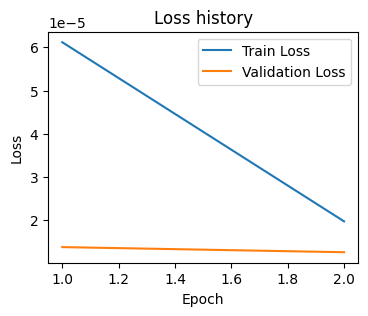

Training Epoch 3/10: 100%|██████████| 1816/1816 [47:59<00:00,  1.59s/it]  


Epoch 3/10, Training Loss: 0.00001520


Validating Epoch 3/10: 100%|██████████| 313/313 [04:09<00:00,  1.26it/s]  

Epoch 3/10, Validation Loss: 0.00001085


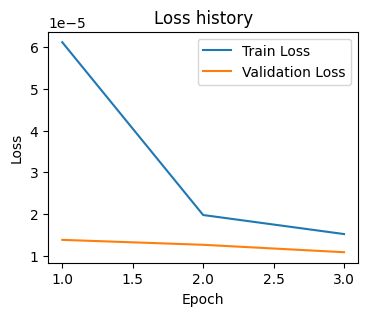

Training Epoch 4/10:   0%|          | 0/1816 [03:24<?, ?it/s]


MemoryError: Unable to allocate 534. MiB for an array with shape (69995520,) and data type float64

In [11]:
train.train_model(model, focal_loss, optimizer, train_patches_loader, val_patches_loader, num_epochs=10, save_checkpoint_flag=True, checkpoint_location="D:\\data_ETIS_781\\Training\\Checkpoints\\model\\SWI_1channel\\581x25_gamma6\\train_581x25_gamma6_checkpoint.pth", display_loss=True)

In [4]:
train.save_model_params ("D:\\data_ETIS_781\\Training\\Checkpoints\\model\\SWI_1channel\\581x25_gamma6\\model_581x25_gamma6_params.json", train_swi_dir, val_swi_dir, test_swi_dir,
                       25, (145,145,18), 3500, 8,
                       "Monai BasicUNetPlusPlus", ["SWI"],
                       "Monai Focal Loss", "Adam",
                       model_notes={"features":(32,32,64,128,256,32)}, loss_notes={"gamma":6,"alpha":0.75}, optimizer_notes={"learning_rate":0.001}, training_epochs=10)

Folder created at D:\data_ETIS_781\Training\Checkpoints\model\SWI_1channel\581x25_gamma6


## Load model and predict

### Predict from patches

In [6]:
model_for_prediction = monai.networks.nets.BasicUNetPlusPlus(spatial_dims=3, in_channels=1, out_channels=1, features=(32,32,64,128,256,32))

BasicUNetPlusPlus features: (32, 32, 64, 128, 256, 32).


In [7]:
learning_rate = 0.01
optimizer_for_prediction = torch.optim.Adam(model_for_prediction.parameters(), lr=learning_rate)

In [8]:
model_for_prediction_checkpoint = torch.load("D:\\data_ETIS_781\\Training\\Checkpoints\\model\\SWI_1channel\\581x25_gamma8\\train_581x25_gamma8_checkpoint.pth")

C:\Users\wijflo\AppData\Local\Temp\ipykernel_20148\3329328946.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_for_prediction_checkpoint = torch.load("D:\\data_ETIS

In [9]:
model_for_prediction.load_state_dict(model_for_prediction_checkpoint["model_state_dict"])
optimizer_for_prediction.load_state_dict(model_for_prediction_checkpoint['optimizer_state_dict'])

In [10]:
train_dir = "D:\\data_ETIS_781\\Training\\Train_dataset\\SWI_Train"
train_label_dir = "D:\\data_ETIS_781\\Training\\Train_labels\\MASK_Train"
train_foreground_label_dir = "D:\\data_ETIS_781\\Training\\Train_labels\MASK_Foreground_Train"
val_dir = "D:\\data_ETIS_781\\Training\\Validation_dataset\\SWI_Val"
val_label_dir = "D:\\data_ETIS_781\\Training\\Validation_labels\\MASK_Val"
val_foreground_label_dir = "D:\\data_ETIS_781\\Training\\Validation_labels\\MASK_Foreground_Val"
test_dir = "D:\\data_ETIS_781\\Training\\Test_dataset\\SWI_Test"
test_label_dir = "D:\\data_ETIS_781\\Training\\Test_labels\\MASK_Test"
test_foreground_label_dir = "D:\\data_ETIS_781\\Training\\Test_labels\\MASK_Foreground_Test"

In [ ]:
#train_dataset = load_subjectsdataset_1channel (train_dir, train_label_dir, train_foreground_label_dir)
#val_dataset = load_subjectsdataset_1channel (val_dir, val_label_dir, val_foreground_label_dir)
test_dataset = inference.load_subjectsdataset_1channel (test_dir, test_label_dir, test_foreground_label_dir)

In [13]:
test_dataloader = tio.SubjectsLoader(test_dataset, batch_size=8, collate_fn=pad_collate_fn, shuffle=False, num_workers=0)

In [ ]:
prediction_dir_location = "D:\\data_ETIS_781\\Training\\Predictions\\Test_Predictions\\SWI_Predictions\\Predictions_patients581_gamma8_sigmoid05"
ground_truth_label_location = test_label_dir

logits_list = inference.run_inference(test_dataloader, model_for_prediction, (145,145,18), (4, 4, 4), test_dir, return_logits=True)
predictions_list = [inference.logit_to_binary_mask(logits, threshold=0.5) for logits in logits_list]
inference.save_predictions(predictions_list, prediction_dir_location, ground_truth_label_location)
ground_truth_masks_list = inference.load_prediction_masks(ground_truth_label_location)
dice_score_list = inference.compute_dice_metric(predictions_list, ground_truth_masks_list)
intersection_list = inference.compute_sensitivity_metric(predictions_list, ground_truth_masks_list)

c:\Users\wijflo\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\torchio\data\image.py:251: UserWarning: Using TorchIO images without a torchio.SubjectsLoader in PyTorch >= 2.3 might have unexpected consequences, e.g., the collated batches will be instances of torchio.Subject with 5D images. Replace your PyTorch DataLoader with a torchio.SubjectsLoader so that the collated batch becomes a dictionary, as expected. See https://github.com/fepegar/torchio/issues/1179 for more context about this issue.
  warnings.warn(message, stacklevel=1)
Running Inference: 100%|██████████| 12/12 [00:07<00:00,  1.67it/s]


Folder created at D:\data_ETIS_781\Training\Predictions\Test_Predictions\SWI_Predictions\Predictions_patients581_gamma8_sigmoid05
Mean Dice Score is 0.13485217094421387
Mean Sensitivity is 0.1378937245303959


In [ ]:
prediction_dir_location = "D:\\data_ETIS_781\\Training\\Predictions\\Test_Predictions\\SWI_Predictions\\Predictions_patients581_gamma8_sigmoid06"

predictions_list = [inference.logit_to_binary_mask(logits, threshold=0.6) for logits in logits_list]
save_predictions(predictions_list, prediction_dir_location, ground_truth_label_location)
ground_truth_masks_list = inference.load_prediction_masks(ground_truth_label_location)
dice_score_list = inference.compute_dice_metric(predictions_list, ground_truth_masks_list)
intersection_list = inference.compute_sensitivity_metric(predictions_list, ground_truth_masks_list)

Folder created at D:\data_ETIS_781\Training\Predictions\Test_Predictions\SWI_Predictions\Predictions_patients581_gamma8_sigmoid06
Mean Dice Score is 0.0002818109351210296
Mean Sensitivity is 0.00014223152519224488


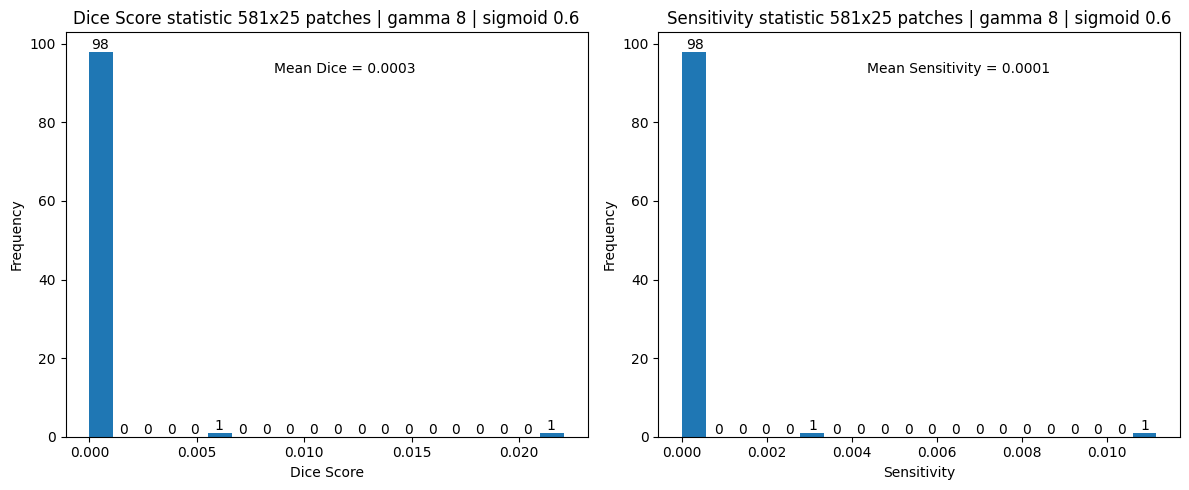

In [33]:
patches = "581x25"
gamma = 8
sigmoid = 0.6

fig, axs = plt.subplots(1,2, figsize=(12, 5))

counts_dice, bins_dice, patches_dice = axs[0].hist(np.array(dice_score_list).flatten(), bins=20)

for count, x in zip(counts_dice, bins_dice[:-1]):
    axs[0].text(x + 0.0005, count, str(int(count)), ha="center", va="bottom")

counts_inter, bins_inter, patches_inter = axs[1].hist(np.array(intersection_list).flatten(), bins=20)

for count, x in zip(counts_inter, bins_inter[:-1]):
    axs[1].text(x + 0.0003, count, str(int(count)), ha="center", va="bottom")

axs[0].text(0.4, 0.9, f"Mean Dice = {dice_score_list.mean():.4f}", transform=axs[0].transAxes)
axs[0].set_xlabel("Dice Score")
axs[0].set_ylabel("Frequency")
axs[0].set_title(f"Dice Score statistic {patches} patches | gamma {gamma} | sigmoid {sigmoid}")

axs[1].text(0.4, 0.9, f"Mean Sensitivity = {intersection_list.mean():.4f}", transform=axs[1].transAxes)
axs[1].set_xlabel("Sensitivity")
axs[1].set_ylabel("Frequency")
axs[1].set_title(f"Sensitivity statistic {patches} patches | gamma {gamma} | sigmoid {sigmoid}")

plt.tight_layout()
plt.savefig(f"D:\\data_ETIS_781\\Training\\Checkpoints\\Metrics_Results\\MetricsStatistic_{patches}patches_gamma{gamma}_sigmoid0{int(10 * sigmoid)}.png")

## Testing ground